In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

In [2]:
games = pd.read_csv("Data/nba/games.csv")
games

,GAME_DATE_EST,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,2021,1610612748,104.0,0.398,0.760,0.333,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,2021,1610612741,101.0,0.443,0.933,0.429,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,2021,1610612759,108.0,0.412,0.813,0.324,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,2021,1610612744,122.0,0.484,0.933,0.400,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,2021,1610612743,115.0,0.551,0.750,0.407,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,2014,1610612737,93.0,0.419,0.821,0.421,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,2014,1610612741,81.0,0.338,0.719,0.381,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,2014,1610612747,98.0,0.448,0.682,0.500,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,2014,1610612761,99.0,0.440,0.771,0.333,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [3]:
games.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [4]:
games.info

<bound method DataFrame.info of       GAME_DATE_EST   GAME_ID  SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  \
0        2022-03-12  22101005    2021    1610612748     104.0        0.398   
1        2022-03-12  22101006    2021    1610612741     101.0        0.443   
2        2022-03-12  22101007    2021    1610612759     108.0        0.412   
3        2022-03-12  22101008    2021    1610612744     122.0        0.484   
4        2022-03-12  22101009    2021    1610612743     115.0        0.551   
...             ...       ...     ...           ...       ...          ...   
25791    2014-10-06  11400007    2014    1610612737      93.0        0.419   
25792    2014-10-06  11400004    2014    1610612741      81.0        0.338   
25793    2014-10-06  11400005    2014    1610612747      98.0        0.448   
25794    2014-10-05  11400002    2014    1610612761      99.0        0.440   
25795    2014-10-04  11400001    2014    1610612748      86.0        0.431   

       FT_PCT_home  FG3_PCT_hom

In [5]:
games.describe()

,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.579600e+04,25796.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.579600e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25796.000000
mean,2.169208e+07,2011.798341,1.610613e+09,103.106044,0.460313,0.759705,0.355896,22.736779,43.345799,1.610613e+09,100.294120,0.449265,0.758082,0.349413,21.403899,42.085146,0.587494
std,5.496041e+06,5.397985,8.638857e+00,13.174726,0.056629,0.100692,0.111940,5.177566,6.621832,8.654846e+00,13.343016,0.055528,0.103418,0.110194,5.140897,6.526951,0.492295
min,1.030000e+07,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.060109e+07,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120040e+07,2012.000000,1.610613e+09,103.000000,0.459000,0.765000,0.355000,23.000000,43.000000,1.610613e+09,100.000000,0.448000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.170070e+07,2016.000000,1.610613e+09,112.000000,0.500000,0.829000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.420000,25.000000,46.000000,1.000000
max,5.200021e+07,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


# Feature Engineering

In [6]:
#Calculating the difference in performance between home and away teams to capture the home advantage by highlighting the performance gaps between the two teams
games['PTS_diff'] = games['PTS_home'] - games['PTS_away']
games['FG_PCT_diff'] = games['FG_PCT_home'] - games['FG_PCT_away']
games['FG3_PCT_diff'] = games['FG3_PCT_home'] - games['FG3_PCT_away']
games['AST_diff'] = games['AST_home'] - games['AST_away']
games['REB_diff'] = games['REB_home'] - games['REB_away']

In [7]:
# Capturing the win streaks for home and away teams
games['HOME_WIN_STREAK'] = 0
games['AWAY_WIN_STREAK'] = 0

home_streaks = {}
away_streaks = {}

for i, row in games.iterrows():
    home_team = row['TEAM_ID_home']
    away_team = row['TEAM_ID_away']

    # Update home team's win streak
    if home_team in home_streaks:
        if row['HOME_TEAM_WINS']:
            home_streaks[home_team] += 1
            games.at[i, 'HOME_WIN_STREAK'] = home_streaks[home_team]
        else:
            home_streaks[home_team] = 0
    else:
        if row['HOME_TEAM_WINS']:
            home_streaks[home_team] = 1
            games.at[i, 'HOME_WIN_STREAK'] = 1
        else:
            home_streaks[home_team] = 0

    # Update away team's win streak
    if away_team in away_streaks:
        if not row['HOME_TEAM_WINS']:
            away_streaks[away_team] += 1
            games.at[i, 'AWAY_WIN_STREAK'] = away_streaks[away_team]
        else:
            away_streaks[away_team] = 0
    else:
        if not row['HOME_TEAM_WINS']:
            away_streaks[away_team] = 1
        else:
            away_streaks[away_team] = 0


In [8]:
# Create new features capturing the moving averages for home and away team statistics
window_size = 5
games['MA_PTS_home'] = games.groupby('TEAM_ID_home')['PTS_home'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['PTS_home']
games['MA_PTS_away'] = games.groupby('TEAM_ID_away')['PTS_away'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['PTS_away']
games['MA_FG_PCT_home'] = games.groupby('TEAM_ID_home')['FG_PCT_home'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['FG_PCT_home']
games['MA_FG_PCT_away'] = games.groupby('TEAM_ID_away')['FG_PCT_away'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['FG_PCT_away']
games['MA_FT_PCT_home'] = games.groupby('TEAM_ID_home')['FT_PCT_home'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['FT_PCT_home']
games['MA_FT_PCT_away'] = games.groupby('TEAM_ID_away')['FT_PCT_away'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['FT_PCT_away']
games['MA_FG3_PCT_home'] = games.groupby('TEAM_ID_home')['FG3_PCT_home'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['FG3_PCT_home']
games['MA_FG3_PCT_away'] = games.groupby('TEAM_ID_away')['FG3_PCT_away'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['FG3_PCT_away']
games['MA_AST_home'] = games.groupby('TEAM_ID_home')['AST_home'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['AST_home']
games['MA_AST_away'] = games.groupby('TEAM_ID_away')['AST_away'].rolling(window=window_size, min_periods=1).mean().reset_index(drop=True) - games['AST_away']

# Visualisations to understand the data after adding the new features

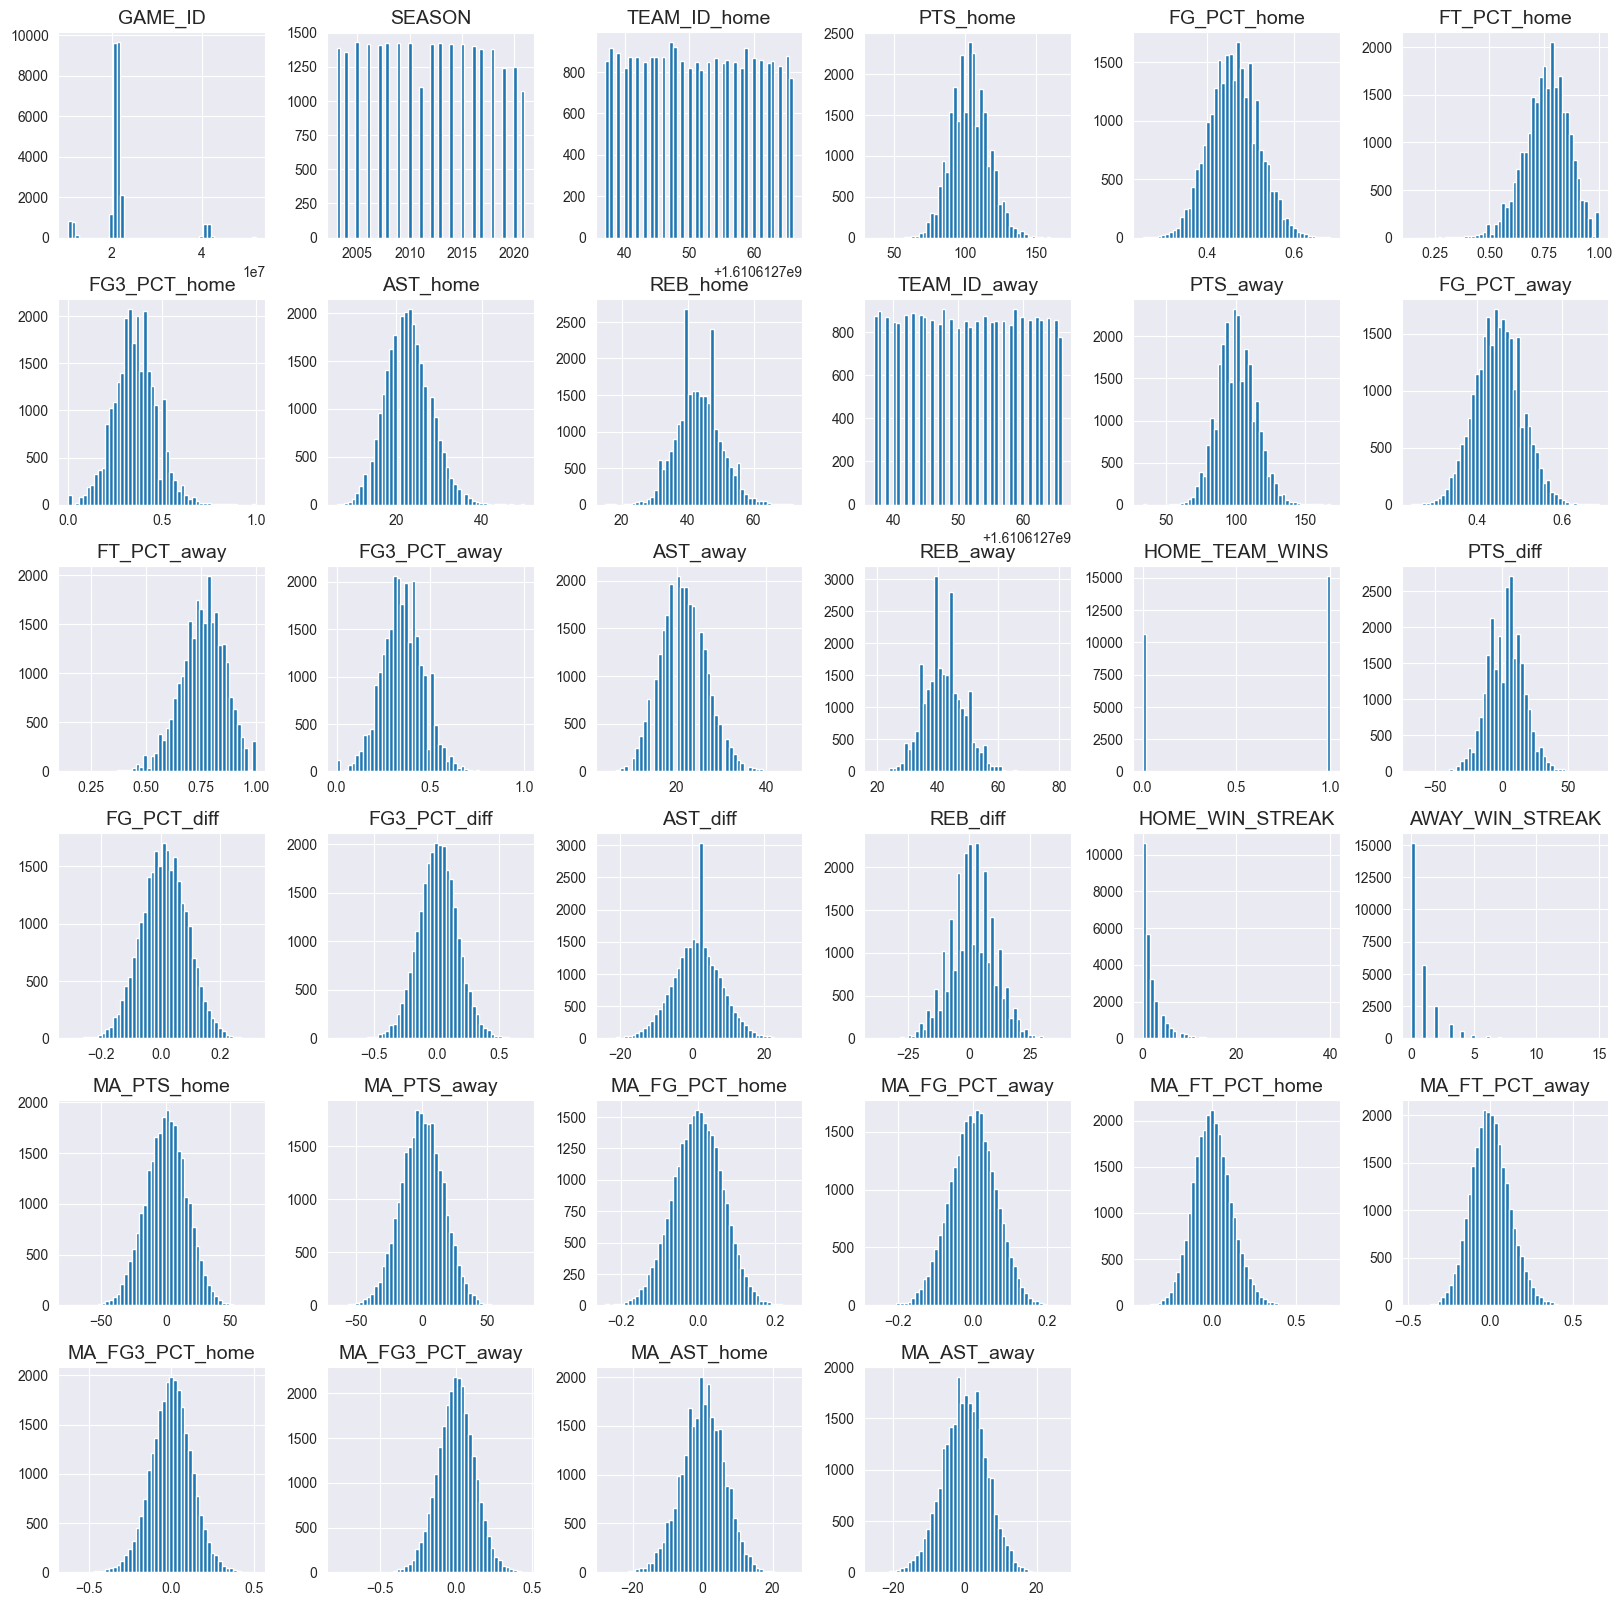

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

games.hist(bins=50, figsize=(20, 20))
plt.show()

## Experimenting correlations with the new attribute combinations

C:\Users\abdal\AppData\Local\Temp\ipykernel_18448\1856198820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap = games.corr()


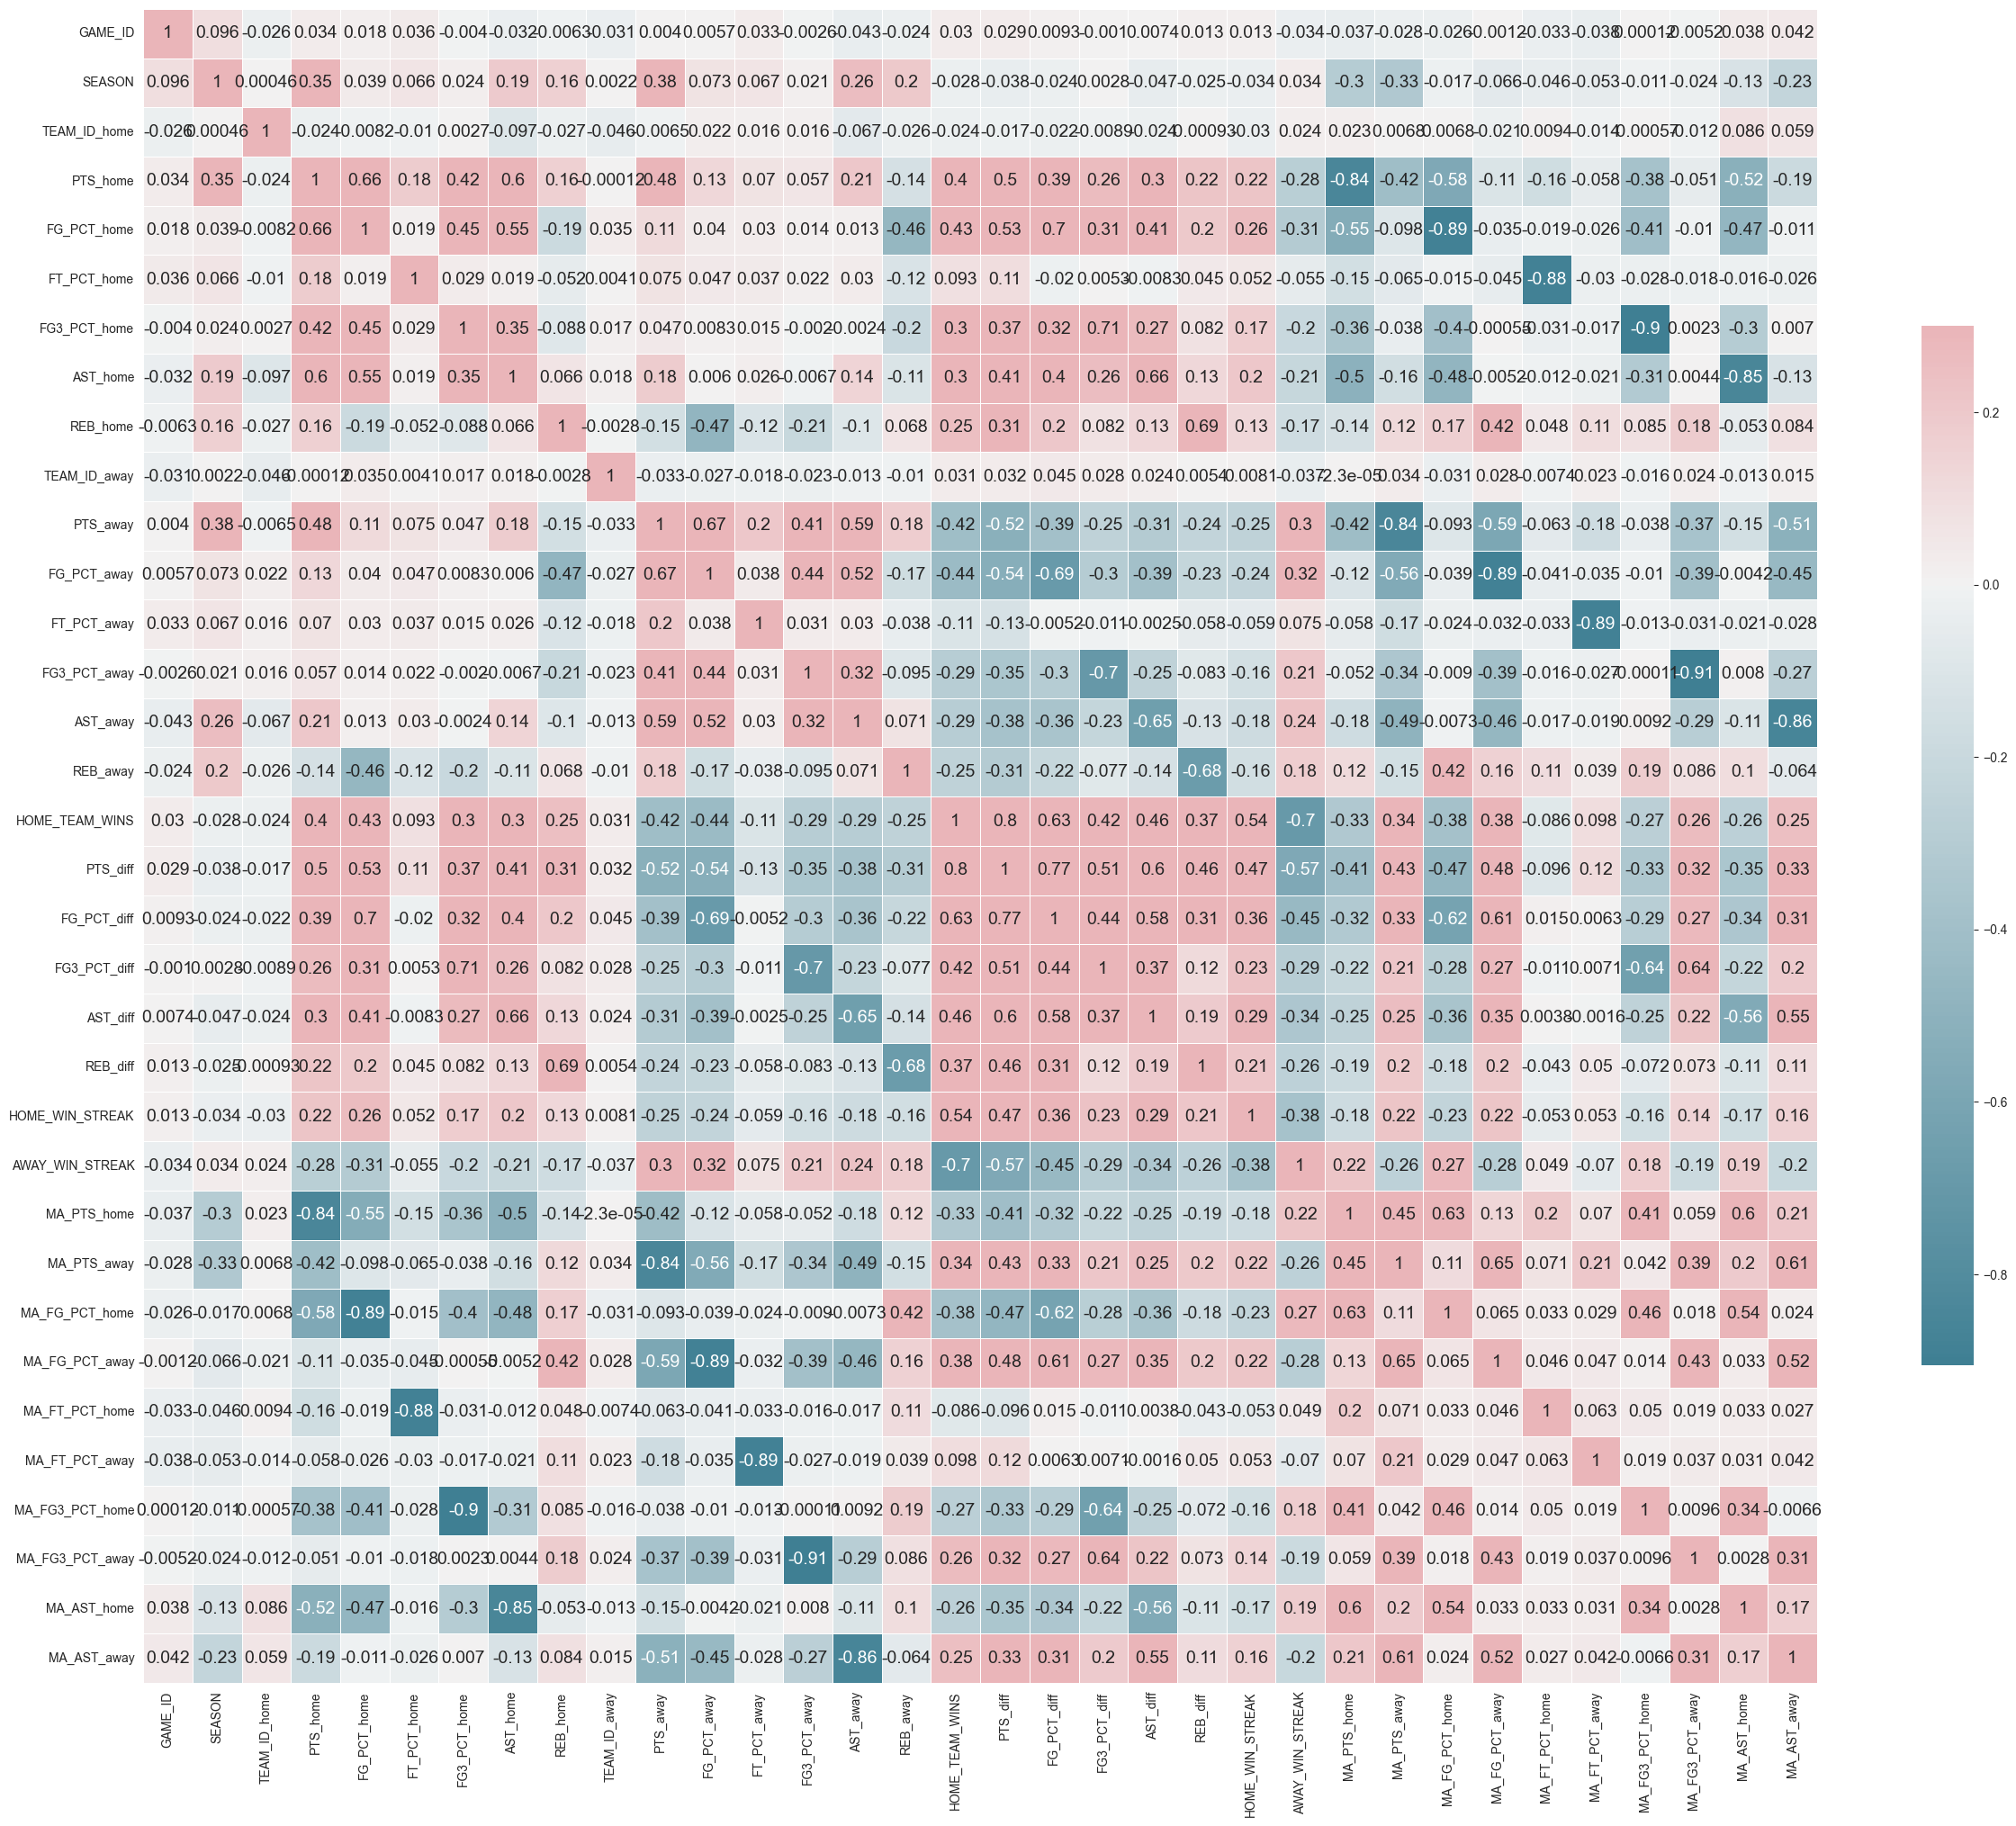

In [10]:
# A heatmap to better represent and understand the correlations
corr_heatmap = games.corr()
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_heatmap, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

MA FGPCT away, MAPTS_AWAY

In [11]:
# drop unnecessary and inversely correlated features
columns_to_drop = ['GAME_DATE_EST','GAME_ID','SEASON','TEAM_ID_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home','TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away','AST_away', 'REB_away','AWAY_WIN_STREAK','MA_PTS_home','MA_PTS_home','MA_FG_PCT_home','MA_FG3_PCT_home','MA_FT_PCT_home','MA_AST_home','MA_FG3_PCT_away','MA_FT_PCT_away']
games = games.drop(columns=columns_to_drop)
games

,PTS_home,FG_PCT_home,HOME_TEAM_WINS,PTS_diff,FG_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff,HOME_WIN_STREAK,MA_PTS_away,MA_FG_PCT_away,MA_AST_away
0,104.0,0.398,0,-9.0,-0.024,-0.024,2.0,7.0,0,2.0,0.078000,5.00
1,101.0,0.443,1,10.0,0.024,0.221,1.0,6.0,1,21.5,0.057000,8.00
2,108.0,0.412,0,-11.0,-0.077,-0.065,5.0,5.0,0,-5.0,-0.032333,1.00
3,122.0,0.484,1,13.0,0.071,0.014,6.0,16.0,1,1.0,0.038000,-5.25
4,115.0,0.551,0,-12.0,0.080,0.020,4.0,-11.0,0,-17.4,-0.025600,-6.60
...,...,...,...,...,...,...,...,...,...,...,...,...
25791,93.0,0.419,1,6.0,0.053,0.046,7.0,7.0,1,8.8,0.088600,2.00
25792,81.0,0.338,0,-4.0,-0.073,0.114,1.0,-7.0,0,13.0,0.047000,4.00
25793,98.0,0.448,1,3.0,0.061,0.000,10.0,2.0,1,2.2,0.066200,3.80
25794,99.0,0.440,1,5.0,-0.029,-0.052,3.0,-15.0,8,4.0,-0.016600,6.80


## Create a Test Set

In [12]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set =shuffle_and_split_data(games,0.33)
len(train_set)

17284

In [14]:
len(test_set)

8512

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(games, games["HOME_TEAM_WINS"]):
    strat_train_set_n = games.iloc[train_index]
    strat_test_set_n = games.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [16]:
strat_train_set, strat_test_set = strat_splits[0]
strat_train_set, strat_test_set = train_test_split(
    games, test_size=0.2, stratify=games["HOME_TEAM_WINS"], random_state=42)

In [17]:
strat_test_set["HOME_TEAM_WINS"].value_counts() / len(strat_test_set)

1    0.587403
0    0.412597
Name: HOME_TEAM_WINS, dtype: float64

In [18]:
def wins_proportions(data):
    return data["HOME_TEAM_WINS"].value_counts() / len(data)

train_set, test_set = train_test_split(games, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": wins_proportions(games),
    "Stratified %": wins_proportions(strat_test_set),
    "Random %": wins_proportions(test_set),
}).sort_index()
compare_props.index.name = "Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Category,,,,,
0,41.25,41.26,41.8,0.02,1.34
1,58.75,58.74,58.2,-0.02,-0.94


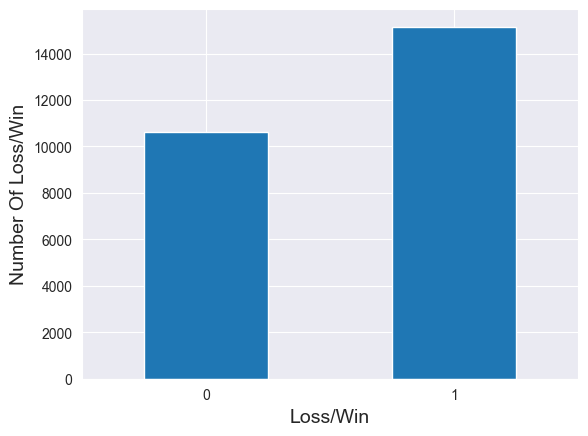

In [19]:
games["HOME_TEAM_WINS"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Loss/Win")
plt.ylabel("Number Of Loss/Win")
plt.show()

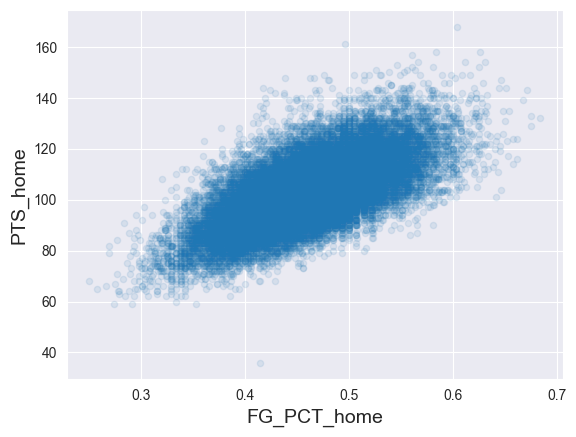

In [20]:
games.plot(kind="scatter", x="FG_PCT_home", y="PTS_home",
             alpha=0.1, grid=True)
plt.show()

In [21]:
corr_matrix = games.corr()

In [22]:
corr_matrix["HOME_TEAM_WINS"].sort_values(ascending=False)

HOME_TEAM_WINS     1.000000
PTS_diff           0.801197
FG_PCT_diff        0.627958
HOME_WIN_STREAK    0.538389
AST_diff           0.457256
FG_PCT_home        0.433626
FG3_PCT_diff       0.417670
PTS_home           0.398901
MA_FG_PCT_away     0.384364
REB_diff           0.366294
MA_PTS_away        0.342566
MA_AST_away        0.250610
Name: HOME_TEAM_WINS, dtype: float64

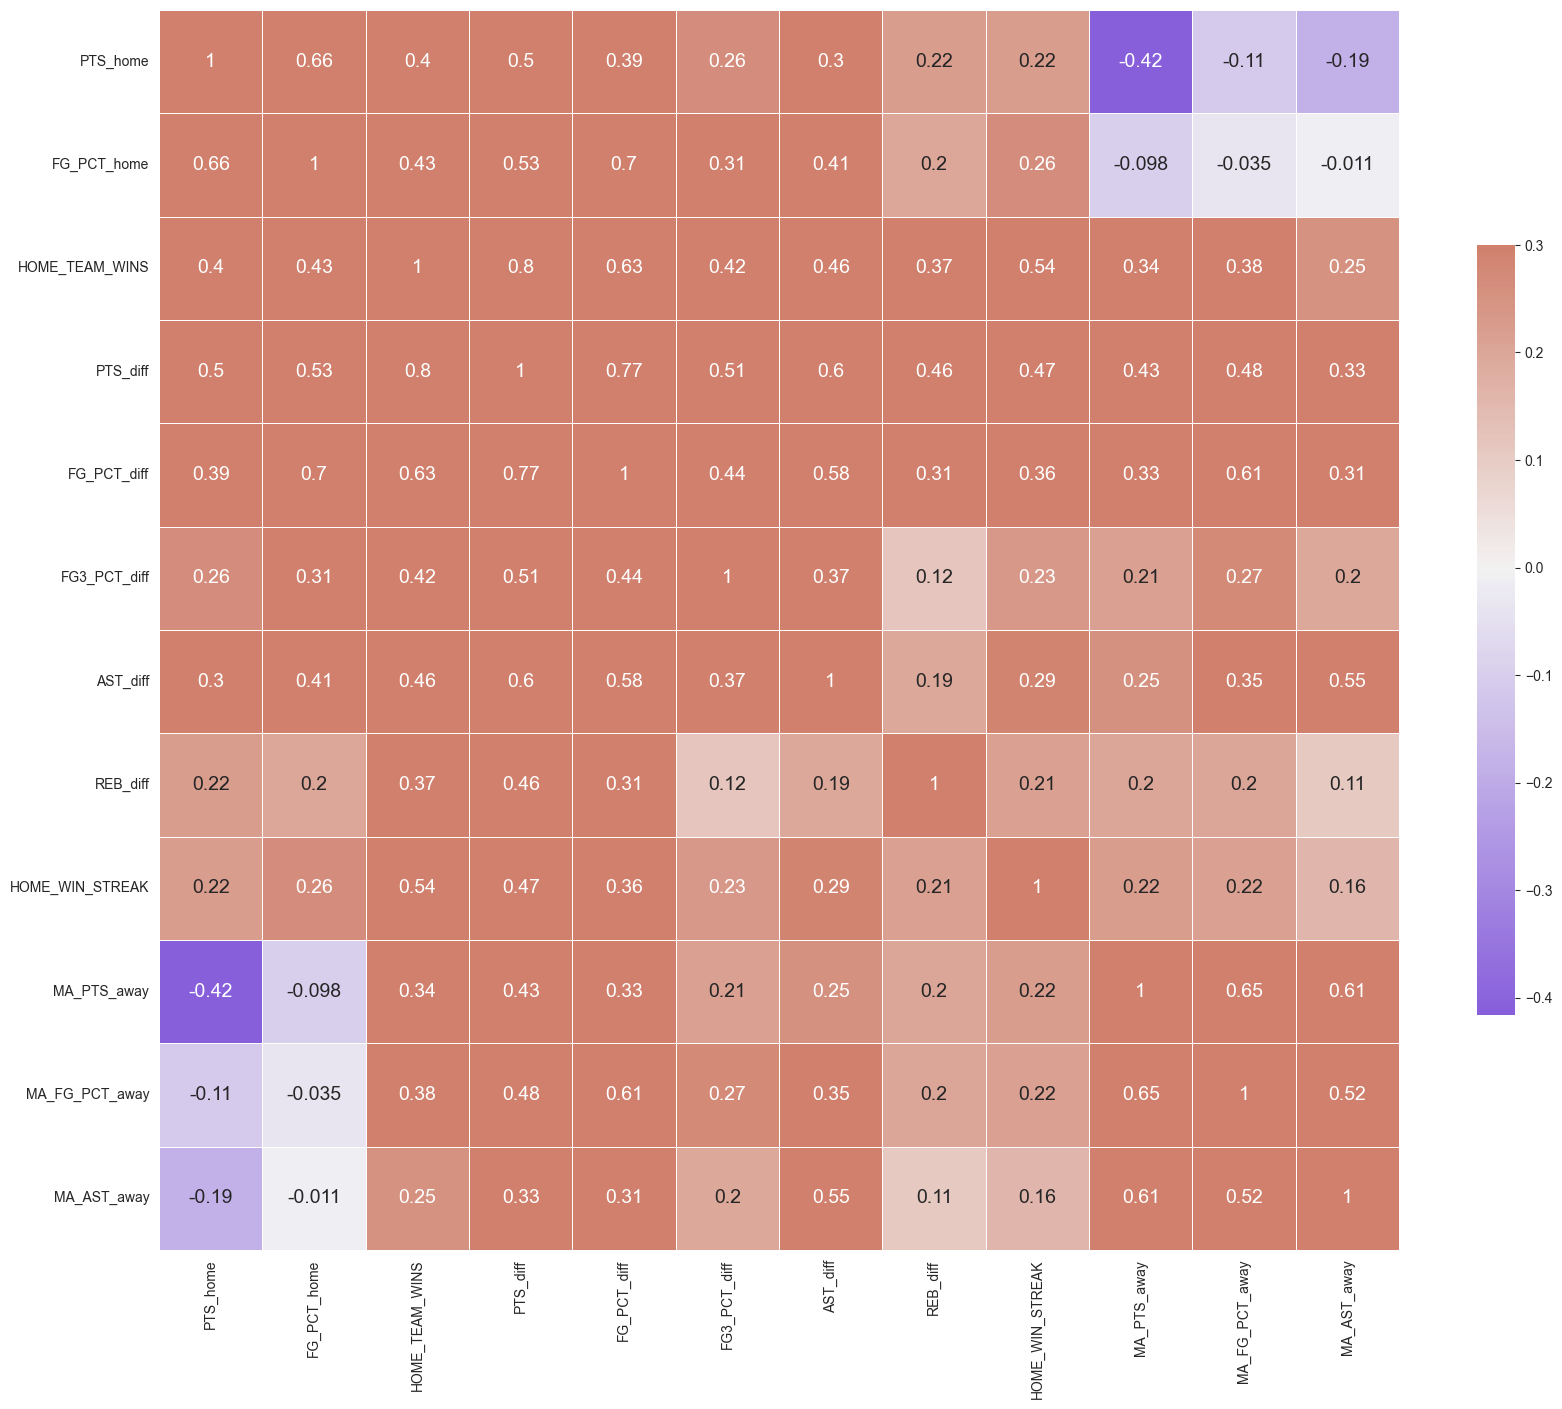

In [23]:
# correlations of the selected features for the model
corr_heatmap = games.corr()

# Draw the heatmap with the mask and correct aspect ratio and generate a custom diverging colormap
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(275, 20, as_cmap=True)
sns.heatmap(corr_heatmap, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

PTS_diff is highly correlated with team wins with value 0.8
FG3_PCT_diff is highly correlated with team wins with value 0.42
FG_PCT_diff is highly correlated with team wins with value 0.63
AST_diff is highly correlated with team wins with value 0.46
REB_diff is highly correlated with team wins with value 0.37
HOME_WIN_STREAK is highly correlated with team wins with value 0.54

We can see that these attributes show a high correlation to team wins instead of the other attributes in the first heatmap

# Prepare the Data for Machine Learning Algorithms


We will now revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn’t actually modify strat_train_set

In [ ]:
games = strat_train_set.drop("HOME_TEAM_WINS", axis=1)
games_labels = strat_train_set["HOME_TEAM_WINS"].copy()

## Data Cleaning

In [ ]:
null_rows_idx = games.isnull().any(axis=1)
games.loc[null_rows_idx].head()

We can observe some missing values (NaNs) in certain columns of the dataset, and we have two options: we can either eliminate the missing values using the dropna function, or we can determine the average of each column from the describe function and replace the NaN values with their corresponding column average value.

Since the data is very small, we don't want to lose data by dropping the rows of the missing values, so we are going to go for the second option

In [ ]:
# Calculate the mean of each column anf filling missing values with it
mean = games[['PTS_home','FG_PCT_home','PTS_diff','AST_diff','REB_diff','FG3_PCT_diff','FG_PCT_diff','MA_PTS_away','MA_FG_PCT_away','MA_AST_away']].mean()
games.fillna(mean, inplace=True)
games.loc[null_rows_idx].head()

# Now let's scale the features and then train the model

As we have selected the second option for handling the missing values, which is considered to be the least disruptive, we can use a convenient tool provided by Scikit-Learn, known as SimpleImputer. One advantage of using this class is that it will save the mean value of each feature. This will enable us to impute missing values not only in the training set, but also in the validation set, test set, and any new data that we may use to evaluate the model.

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

Separating out the numerical attributes to use the `"mean"` strategy:

In [28]:
games = games.select_dtypes(include=[np.number])

In [29]:
imputer.fit(games)

SimpleImputer()

In [30]:
imputer.statistics_

array([1.03057936e+02, 4.60462032e-01, 2.84127061e+00, 1.15328112e-02,
       7.08624799e-03, 1.34426230e+00, 1.24215596e+00, 1.79162628e+00,
       1.33574997e-01, 2.89100006e-04, 3.09953614e-02])

Check that this is the same as manually computing the median of each attribute:

In [31]:
games.mean().values

array([1.03057936e+02, 4.60462032e-01, 2.84127061e+00, 1.15328112e-02,
       7.08624799e-03, 1.34426230e+00, 1.24215596e+00, 1.79162628e+00,
       1.33574997e-01, 2.89100006e-04, 3.09953614e-02])

transform the training set

In [32]:
X = imputer.transform(games)

In [33]:
imputer.feature_names_in_

array(['PTS_home', 'FG_PCT_home', 'PTS_diff', 'FG_PCT_diff',
       'FG3_PCT_diff', 'AST_diff', 'REB_diff', 'HOME_WIN_STREAK',
       'MA_PTS_away', 'MA_FG_PCT_away', 'MA_AST_away'], dtype=object)

In [34]:
games_tr = pd.DataFrame(X, columns=games.columns,
                          index=games.index)

In [35]:
games_tr.loc[null_rows_idx].head()

,PTS_home,FG_PCT_home,PTS_diff,FG_PCT_diff,FG3_PCT_diff,AST_diff,REB_diff,HOME_WIN_STREAK,MA_PTS_away,MA_FG_PCT_away,MA_AST_away
18334,103.057936,0.460462,2.841271,0.011533,0.007086,1.344262,1.242156,0.0,0.133575,0.000289,0.030995
18424,103.057936,0.460462,2.841271,0.011533,0.007086,1.344262,1.242156,0.0,0.133575,0.000289,0.030995
18321,103.057936,0.460462,2.841271,0.011533,0.007086,1.344262,1.242156,0.0,0.133575,0.000289,0.030995
18352,103.057936,0.460462,2.841271,0.011533,0.007086,1.344262,1.242156,0.0,0.133575,0.000289,0.030995
18394,103.057936,0.460462,2.841271,0.011533,0.007086,1.344262,1.242156,0.0,0.133575,0.000289,0.030995


In [36]:
imputer.strategy

'mean'

Now lets remove some outliers, outliers refer to datapoints that are sigininifcantly different from other data points, outliers can affect the performance of the model so it is worth removing them before building the model

In [37]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

the Isolation Forest model returns a prediction of whether each data point in X is an outlier or not. If a data point is predicted to be an outlier, it will have a value of -1, and if it is predicted to be a normal data point, it will have a value of 1.

In [38]:
outlier_pred

array([ 1,  1, -1, ...,  1,  1, -1])

In [39]:
#remove outliers
games = games.iloc[outlier_pred == 1]
games_labels = games_labels.iloc[outlier_pred == 1]

# Modelling
Since we are trying to predict a value, this must be a regression problem, we will use 3 different models to do the predicition and evaluate them.

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
games = std_scaler.fit_transform(games)

# 1. Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(games, games_labels)

LinearRegression()

In [42]:
games_predictions = lin_reg.predict(games)

In [43]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(games_labels, games_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = lin_reg.score(games, games_labels)

print("Mean Squared Error: ",lin_mse)
print("Coeffecient of Determination: ",lin_r2)
print("Root Mean Squared Error: ",lin_rmse)

Mean Squared Error:  0.0691749335304724
Coeffecient of Determination:  0.7152125718487883
Root Mean Squared Error:  0.2630112802342751


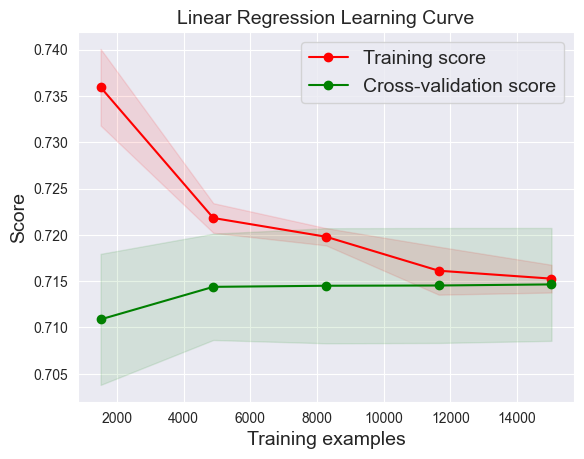

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, games, games_labels, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "o-", color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g",
         label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Linear Regression Learning Curve")
plt.legend(loc="best")
plt.show()

# 2. Logisitic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(games, games_labels)

LogisticRegression()

In [46]:
games_predictions = log_reg.predict(games)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_accuracy = accuracy_score(games_labels, games_predictions)
log_precision = precision_score(games_labels, games_predictions)
log_recall = recall_score(games_labels, games_predictions)
print("Accuracy: ",log_accuracy)
print("Precision: ",log_precision)
print("Recall: ",log_recall)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


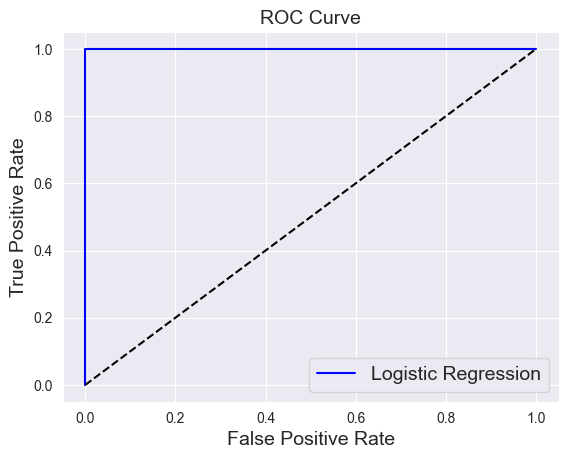

In [48]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

log_conf_matrix = confusion_matrix(games_labels, games_predictions)

fpr, tpr, thresholds = roc_curve(games_labels, games_predictions)
plt.plot(fpr, tpr, "b-", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

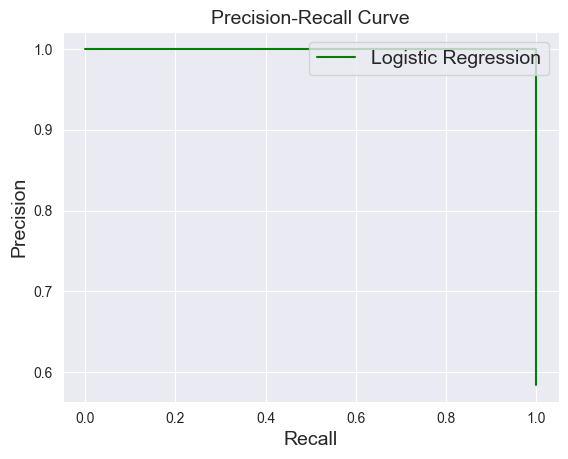

In [49]:
precision, recall, thresholds = precision_recall_curve(games_labels, games_predictions)
plt.plot(recall, precision, "g-", label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

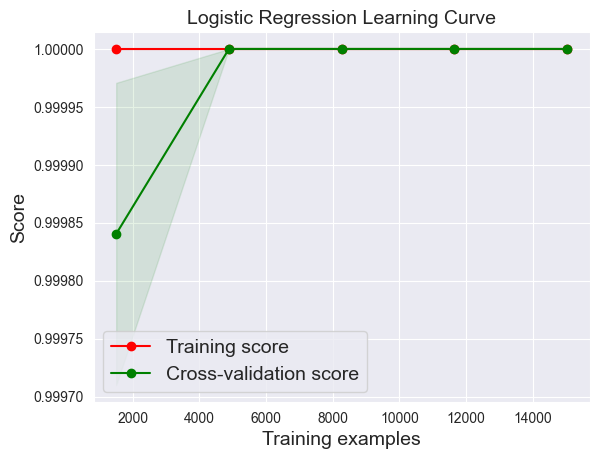

In [50]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    log_reg, games, games_labels, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, "o-", color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g",
         label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Logistic Regression Learning Curve")
plt.legend(loc="best")
plt.show()

# 3. Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(games, games_labels)

RandomForestRegressor()

In [52]:
games_predictions = forest_reg.predict(games)

In [53]:
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(games_labels, games_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = forest_reg.score(games, games_labels)
print("Mean Squared Error: ",forest_mse)
print("Coeffecient of Determination: ",forest_r2)
print("Root Mean Squared Error: ",forest_mse)

Mean Squared Error:  0.0
Coeffecient of Determination:  1.0
Root Mean Squared Error:  0.0


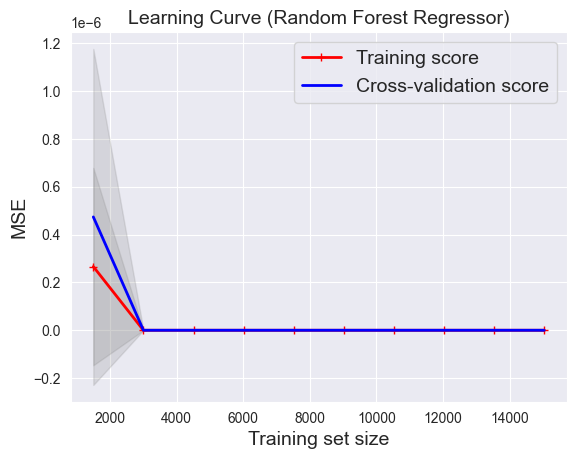

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(forest_reg, games, games_labels,
                                                        cv=5, scoring="neg_mean_squared_error",
                                                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, -train_scores_mean, "r-+", linewidth=2, label="Training score")
plt.plot(train_sizes, -test_scores_mean, "b-", linewidth=2, label="Cross-validation score")
plt.fill_between(train_sizes, -train_scores_mean - train_scores_std,
                 -train_scores_mean + train_scores_std, color="gray", alpha=0.2)
plt.fill_between(train_sizes, -test_scores_mean - test_scores_std,
                 -test_scores_mean + test_scores_std, color="gray", alpha=0.2)
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.title("Learning Curve (Random Forest Regressor)")
plt.legend(loc="best")
plt.show()